# Workshop 3
Fabián González Vera A01367585
17/08/2023

## 3 Confidence level, Type I Error and pvalue

3.1 CHALLENGE - IS AMD MEAN RETURN HIGHER THAN INTEL MEAN RETURN?

In [10]:
from symbulate import *
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
import numpy as np

In [11]:
# Getting price data and selecting adjusted price columns:
sprices = yf.download(tickers=['AMD','INTC'],start="2017-01-01",interval="1mo")
sprices=sprices['Adj Close']
sprices

[*********************100%%**********************]  2 of 2 completed


,AMD,INTC
Date,,
2017-01-01,10.370000,30.562124
2017-02-01,14.460000,30.047495
2017-03-01,14.550000,30.153332
2017-04-01,13.300000,30.220209
2017-05-01,11.190000,30.186769
...,...,...
2023-04-01,89.370003,30.822439
2023-05-01,118.209999,31.199532
2023-06-01,113.910004,33.320126


In [12]:
sprices =  np.log(sprices) - np.log(sprices.shift(1))

In [13]:
sprices = sprices.dropna()
sprices

,AMD,INTC
Date,,
2017-02-01,0.332469,-0.016982
2017-03-01,0.006205,0.003516
2017-04-01,-0.089827,0.002215
2017-05-01,-0.172744,-0.001107
2017-06-01,0.109107,-0.060474
...,...,...
2023-04-01,-0.092284,-0.050536
2023-05-01,0.279678,0.012160
2023-06-01,-0.037054,0.065759


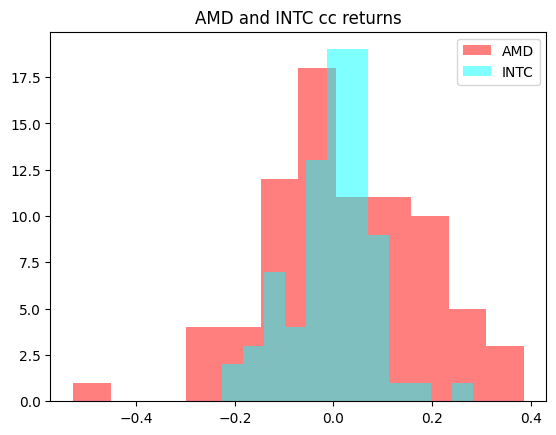

In [14]:
plt.hist(sprices['AMD'], bins=12, alpha=0.5, color='red')
plt.hist(sprices['INTC'], bins=12, alpha=0.5, color='cyan')
plt.title("AMD and INTC cc returns")
plt.legend(["AMD","INTC"])
plt.show()

HYPOTHESIS
 mean monthly cc return of AMD (AMD) is greater than the mean monthly return of Intel. Use data from Jan 2017 to date

H0: (mean(AMDr) - mean(INTCr)) > 0

Ha: (mean(AMDr) - mean(INTCr)) <> 0

In [15]:
# Calculate SE difference
n = sprices['AMD'].count()
amdVar = sprices['AMD'].var()
intelVar = sprices['INTC'].var()

SEDiff = sqrt((amdVar +  intelVar)/n)
SEDiff

0.020824805120612678

In [16]:
# calculate t-stadistic

t = (sprices['AMD'].mean() - sprices['INTC'].mean())/SEDiff
t

1.3763221910093324

In [17]:
# calculate p-value
# Calculating the pvalue from the t-Statistic:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((n-1) / n**2) * (amdVar + intelVar)**2  / ( (amdVar/n)**2 + (intelVar/n)**2  ) )
# Now we calculate the pvalue with the t and df:
pvalue = 2 * st.t.sf(np.abs(t), df)
pvalue

0.17133598353809748

In [18]:
# p value but with ttest_inf function
# Using the ttest_ind function from stats:
st.ttest_ind(sprices['AMD'],sprices['INTC'],equal_var=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

TtestResult(statistic=1.3763221910093324, pvalue=0.17133598353809748, df=117.64360967993143)

THIS MEANS THAT THE pvalue IS QUITE SMALL, BUT THE t-value IS SMALLER THAN 2, THIS MEANS THAT THE HIPOTHESIS IS RIGHT

# 4 Measures of linear relationship

In [19]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%%**********************]  2 of 2 completed


<Figure size 640x480 with 0 Axes>

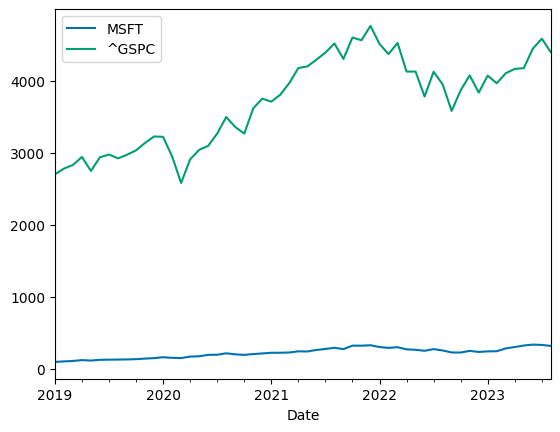

In [20]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [21]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 640x480 with 0 Axes>

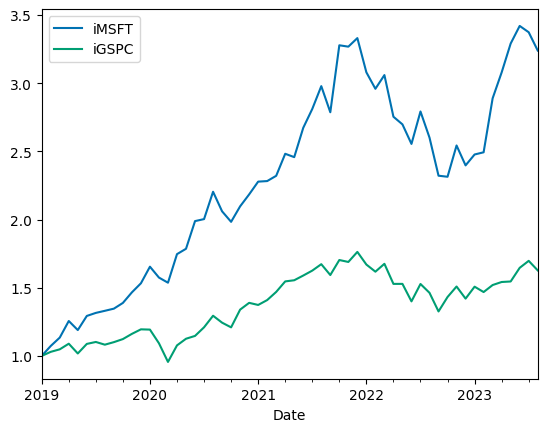

In [22]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [23]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

In [24]:
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083538,0.066658


<Figure size 640x480 with 0 Axes>

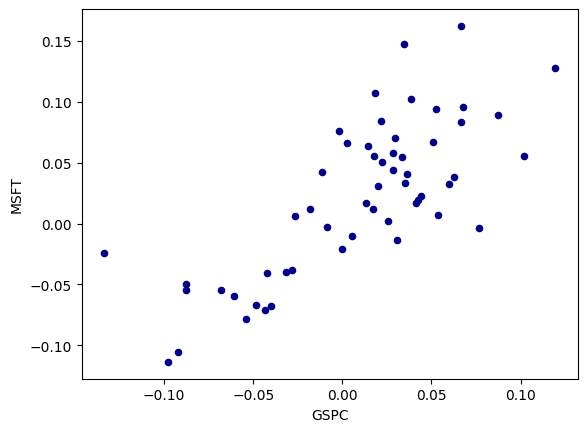

In [25]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 640x480 with 0 Axes>

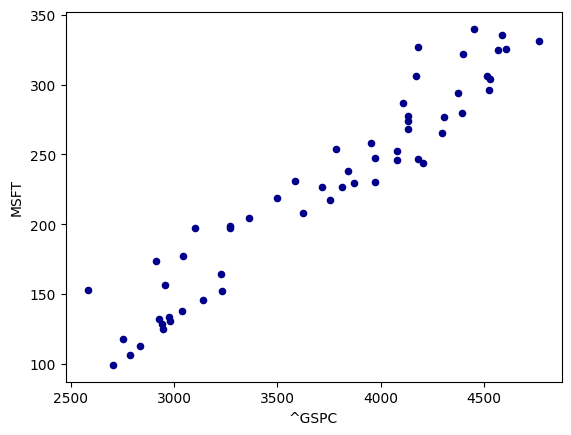

In [26]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 640x480 with 0 Axes>

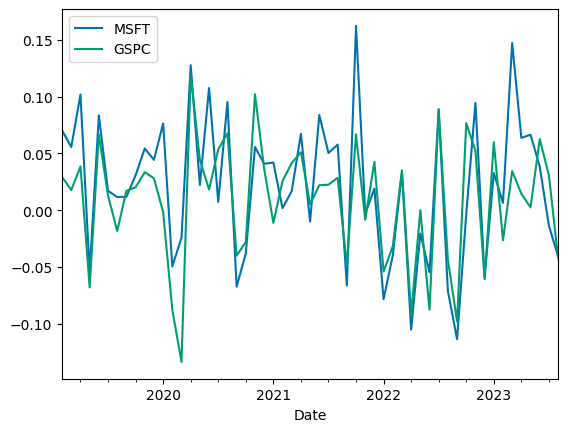

In [27]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

## 4.3 Calculating covariance and correlation

In [28]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.002583773701003047

In [29]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00396164, 0.00258377],
       [0.00258377, 0.00287238]])

In [30]:
cov = covm[0,1]
cov

0.0025837737010030466

In [31]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.76594234],
       [0.76594234, 1.        ]])

In [32]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7659423391382149

In [33]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

PearsonRResult(statistic=0.7659423391382149, pvalue=9.551890635049548e-12)